## Experiment 9 c

# HOG

In [2]:
pip install scikit-image


  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 837.5 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/12.8 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.3/12.8 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.8 MB 1.5 MB/s eta 0:00:08
   ---- ----------------------------------- 1.6/12.8 MB 1.5 MB/s eta 0:00:08
   ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.8 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.8 MB 1.2 MB/s eta 0:00:10
   --------- ------------------------------ 2.9/12.8 MB 1.3 MB/s eta 0:00:08
   ---------- ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Image shape: (128, 64)
HOG Descriptor length (Feature Vector): 3780


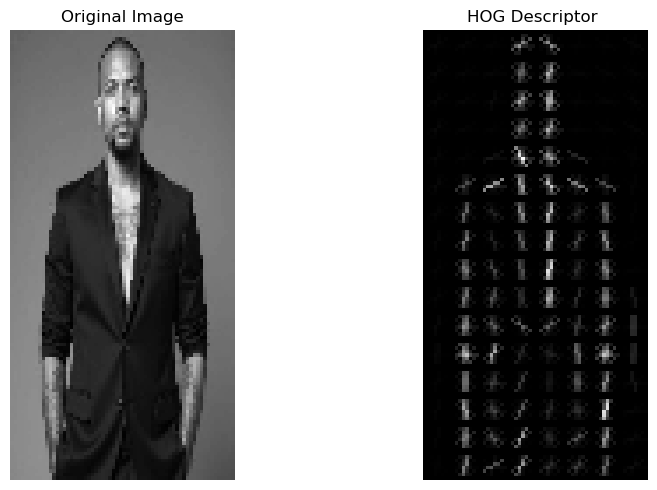

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import exposure

# --- Setup ---
# 1. Load the Image (Replace 'your_image.jpg' with a real path)
# It's best to use a clear image with strong edges, like a photo of a person.
image_path = 'person.jpg' 
try:
    # Load the image in grayscale, as HOG operates on intensity
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError
except FileNotFoundError:
    print(f"Error: Image '{image_path}' not found. Using a dummy array for demonstration.")
    # Create a simple image array for demonstration if a file isn't found
    image = np.zeros((128, 64), dtype="uint8")
    image[32:96, 16:48] = 255 # Simple white rectangle on black background
    
# Rescale the image to a common size for HOG if necessary
image = cv2.resize(image, (64, 128)) 
    
# --- 1. Gradient Computation & 2. Orientation Binning & 3. Block Normalization ---

# The skimage.feature.hog function performs Steps 1, 2, 3, and 4 efficiently.
# It computes gradients, bins orientations, normalizes blocks, and concatenates the final vector.

# Parameters used:
# orientations: The number of orientation bins (e.g., 9 bins for 0-180 degrees)
# pixels_per_cell: Size of a cell (e.g., 8x8 pixels)
# cells_per_block: Size of a block (e.g., 2x2 cells)
# transform_sqrt: Applies power law compression to input image before gradient computation.
# feature_vector: Set to True to get the final HOG descriptor vector (Step 4).
# visualize: Set to True to get the visualization image (Step 5).

fd, hog_image = hog(image, 
                    orientations=9, 
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), 
                    transform_sqrt=True,
                    block_norm='L2-Hys', # Standard L2-Hys normalization
                    feature_vector=True,
                    visualize=True)

# --- 4. Feature Vector Construction ---
# 'fd' is the final HOG feature descriptor vector.
print(f"Image shape: {image.shape}")
print(f"HOG Descriptor length (Feature Vector): {len(fd)}")
# For a 128x64 image, with 8x8 cells and 2x2 blocks, the vector length is:
# (128/8) * (64/8) * (2-1+1) * (2-1+1) * 9 = 16 * 8 * 4 * 9 = 4608

# --- 5. Visualization ---

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image and the HOG visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Descriptor ')

plt.tight_layout()
plt.show()